In [33]:
import unittest
from glob import glob
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt


In [96]:
class curve:
    
    def __init__(self, para):
        self.para = para
        
    def degree(self):
        return len(self.para)-1
    
    def polynomial_value(self, x):
        y = 0
        for i in range(len(self.para)):
             y += self.para[i]*(x**i)
        return y
    def plot(self):
        x_plot = np.linspace(-100, 100, 400)
        plt.plot(x_plot, self.polynomial_value(x_plot))
    def plot_random_point(self):
        r = np.random.uniform(-100, 100, 10)
        plt.plot(r, self.polynomial_value(r),'o')
    def random_point(self):
        r = np.random.uniform(-100, 100, 10)
        return r, self.polynomial_value(r)
    
            

In [97]:
# a=([200,300,13])
# example=curve(a)

In [98]:
# example.plot_random_point()
# example.plot()
# example.random_point()

In [99]:
class estimation:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def plot(self):
        plt.plot(self.x, self.y, 'o')
        
    def plot_degree(self, n):
        reg = linear_model.LinearRegression()
        model = make_pipeline(PolynomialFeatures(n), linear_model.LinearRegression())
        model.fit(self.x.reshape(-1, 1), self.y.reshape(-1, 1))
        x_plot = np.linspace(-100, 100, 400)
        plt.plot(x_plot, model.predict(x_plot.reshape(-1, 1)))
        
        
    def degree_is(self):
        reg = linear_model.LinearRegression()
        MSE = np.ones(9)
        for d in range(1, 10):
            model = make_pipeline(PolynomialFeatures(d), linear_model.LinearRegression())
            model.fit(self.x[:5].reshape(-1, 1),self.y[:5].reshape(-1, 1))
            
            MSE[d-1] = mean_squared_error(model.predict(self.x[5:].reshape(-1, 1)), self.y[5:].reshape(-1, 1))
        MSE = list(MSE)
        return (MSE.index(min(MSE))+1)
        
    
        
        
            
            
            
        

int

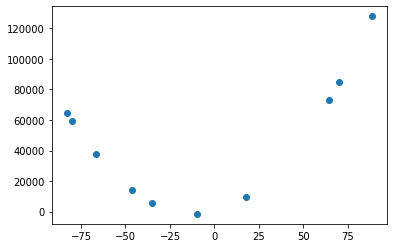

In [53]:
# test=example.random_point()
# texample=estimation(test[0],test[1])
# texample.plot()
# type(texample.degree_is())

In [39]:
#to read the test file
def parse_test(file):
    '''
    Parse a test file
    :param file: 
    :return: 
    '''

    (x, y) = ([], [])
    with open(file, 'r') as f:
        l = [[num.replace('\n', '') for num in line.split(',')]
             for line in f]
    try :
        for i in range(len(l[0])):
            x.append(float(l[0][i]))
        for i in range(len(l[1])):
            y.append(float(l[1][i]))
    except Exception:
        print("incorrect points input")
        return 0, 0, 0
    
    return (np.array(x), np.array(y), l[2][0])

In [40]:
# To launch the test by the test data at the path
def launch_tests(path):
    right_degree = 0
    nb_test = 0
    for test_file in glob(path):
        (x,y,right_d) = \
            parse_test(test_file)
        test_class = estimation(x,y)
       # print(right_d)
       # print(test_class.degree_is())
       # test_class.plot_degree(5)
       # test_class.plot()
        if (test_class.degree_is() == int(right_d)):
            right_degree += 1  
        nb_test += 1
    print("test ", nb_test, "example, get ", right_degree, "right")

    

In [41]:
path1 = "./test_file/test.txt"
path2 = "./test_file/test2.txt"
path3 = "./test_file/test3.txt"
path4 = "./test_file/*"


In [42]:
#launch_tests(path4)

In [118]:
#use the unitest by CircuitCI
class Unittest(unittest.TestCase):
    
    def test_with_degree_2(self):
        for_test=curve([30,13])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())

    def test_with_degree_2(self):
        for_test=curve([10,30,13])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
        
    def test_with_degree_3(self):
        for_test=curve([10,30,13,30])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
    def test_with_degree_3_2(self):
        for_test=curve([30,20,5,9])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
        
    def test_with_degree_3_3(self):
        for_test=curve([1,2,3,4])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
        
    def test_with_degree_4(self):
        for_test=curve([10,4,30,13,30])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
    def test_with_degree_4_2(self):
        for_test=curve([20,40,10,21,32])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
        
    def test_with_degree_4_2(self):
        for_test=curve([5,4,3,2,1])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
        
    def test_with_degree_5(self):
        for_test=curve([10,4,30,2,13,30])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
    def test_with_degree_6(self):
        for_test=curve([10,4,30,2,13,20,30])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
    def test_with_degree_7(self):
        for_test=curve([5,10,4,30,2,13,20,30])
        points=for_test.random_point()
        self.assertEqual(for_test.degree(), estimation(points[0],points[1]).degree_is())
    
        
# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
if __name__ == '__main__':
    unittest.main()

.........
----------------------------------------------------------------------
Ran 9 tests in 0.256s

OK
